# Dataextraktion & rensning

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import gc
from external_functions import *
#plt.style.available
# plt.style.use("dark_background")
gc.collect()

28

In [18]:
pd.set_option('display.max_colwidth', 60)
df = pd.read_json(os.path.join("data","part-01.json"))
print(df.shape)
df.head()

(1010293, 9)


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I think seaso...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police do things a...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7.0,Nothing special,3 May 2020,0,"Except K K , no other actor looks comfortable in acting....","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8.0,Good but,3 May 2020,0,I'm guessing that as a 62 year old white woman I'm not t...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2.0,An honest review,3 May 2020,0,Here's the truth. There's not much to this movie at all....,"[26, 41]"


In [23]:
df = df[["rating", "review_detail"]].dropna()
df["rating"] = df["rating"].astype(int)
print(df.shape)

(958773, 2)


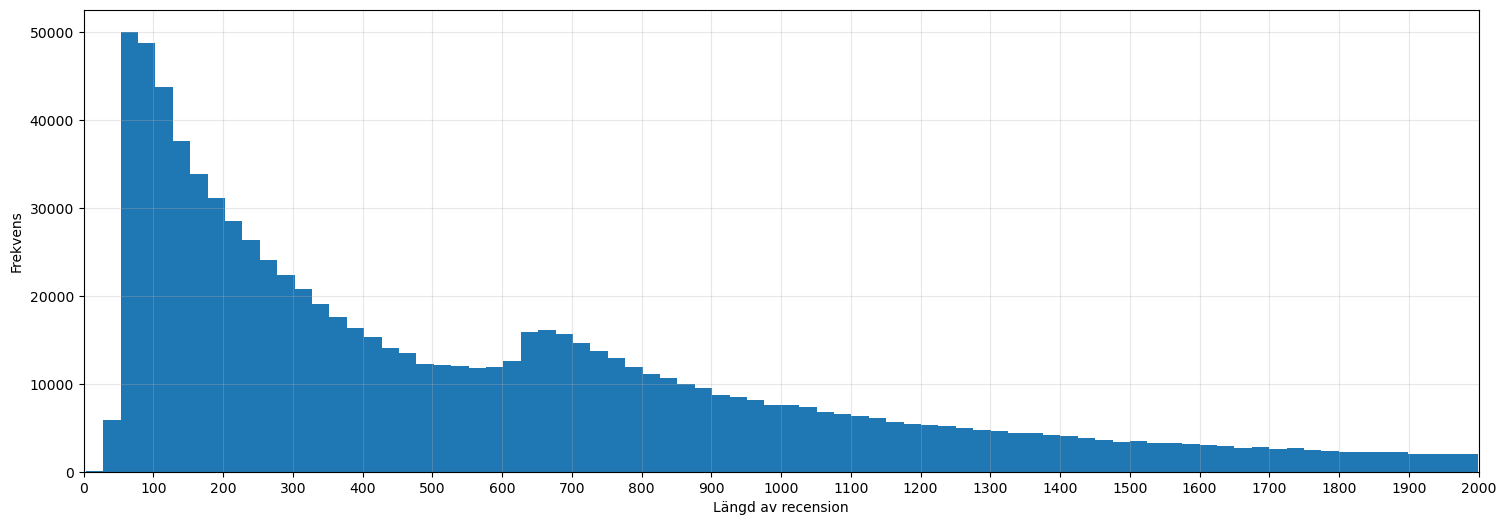

In [4]:
plt.figure(figsize=(18, 6))
maximum = 2000
binwidth = 25
num_bins = int(maximum/binwidth)
plt.hist([len(element) for element in df["review_detail"] if len(element)<maximum], bins=num_bins)

# Add labels and title
plt.xlabel("Längd av recension")
plt.ylabel("Frekvens")
plt.xlim(0, maximum)
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 2000+1, 100))

# Show the plot
plt.show()

In [24]:
pd.set_option("display.max_colwidth", 200)
df = df[df['review_detail'].str.len() >= 200]
print(df.shape)
df.head(5)

(711236, 2)


,rating,review_detail
0,9,"I enjoyed the first season, but I must say I think season 2 is even stronger. Ricky does a great job as both writer, actor and director and brings out the best in a superb supporting cast. If ther..."
1,6,"I know Iceland is a small country and police do things a bit different in Europe but c'mon... The incompetent police work robs this show of any believability.\n1st Detective: ""hey we got two perso..."
3,8,I'm guessing that as a 62 year old white woman I'm not the target demographic but I enjoyed this show. Good to see others perspectives and loved the wry humor. More entertaining than The Office an...
4,2,Here's the truth. There's not much to this movie at all. I was sucked in by the high rating and overly positive reviews that must have submitted by cast and film crew. I won't give a technical ana...
5,10,"Having seen this film for the first time today, 70 years after its release and still having the impact that it has is outstanding. Excellent writing, directing and performances all around, particu..."


In [13]:
y = df["rating"].to_numpy()
x = df["review_detail"].to_numpy()
print(x[:5])

['enjoy season think season strong ricky great job writer actor director bring good superb support cast thing change like hear talk people speak person pretty hard fault funny emotional comedy'
 'know iceland small country police thing bit different europe cmon incompetent police work rob believability detective hey get person interest need talk possibly serial killer visit firstnd detective lets split'
 'guess year old white woman target demographic enjoy good perspective love wry humor entertaining office park rec broad negative assumption white'
 'here truth movie suck high rating overly positive review submit cast film crew will not technical analysis like ameteur movie critic sincere opinion droving annoying jump able hear opening dialogue ambient sound time difficult hear say turn caption know droving start negative balance good thing happen move forward win film beautiful nature scene appear low budget standpoint decent pace not fall asleep close occasion thing state cinematogra

In [14]:
for i in range(len(x)):
    x[i] = clean_text(x[i])
print(x[:5])

['enjoy season think season strong ricky great job writer actor director bring good superb support cast thing change like hear talk people speak person pretty hard fault funny emotional comedy'
 'know iceland small country police thing bit different europe cmon incompetent police work rob believability detective hey get person interest need talk possibly serial killer visit firstnd detective lets split'
 'guess year old white woman target demographic enjoy good perspective love wry humor entertaining office park rec broad negative assumption white'
 'here truth movie suck high rating overly positive review submit cast film crew will not technical analysis like ameteur movie critic sincere opinion droving annoying jump able hear opening dialogue ambient sound time difficult hear say turn caption know droving start negative balance good thing happen move forward win film beautiful nature scene appear low budget standpoint decent pace not fall asleep close occasion thing state cinematogra

In [15]:
for i in range(len(x)):
    x[i] = lemmatize_text(x[i])
print(x[:5])

['enjoy season think season strong ricky great job writer actor director bring good superb support cast thing change like hear talk people speak person pretty hard fault funny emotional comedy'
 'know iceland small country police thing bite different europe cmon incompetent police work rob believability detective hey person interest need talk possibly serial killer visit firstnd detective let split'
 'guess year old white woman target demographic enjoy good perspective love wry humor entertain office park rec broad negative assumption white'
 'truth movie suck high rating overly positive review submit cast film crew technical analysis like ameteur movie critic sincere opinion drove annoying jump able hear open dialogue ambient sound time difficult hear turn caption know drove start negative balance good thing happen forward win film beautiful nature scene appear low budget standpoint decent pace fall asleep close occasion thing state cinematographer pace save film rightfully drove fall

In [16]:
data = np.concatenate((y[:10].reshape(-1,1), x[:10].reshape(-1,1)), axis=1)
print(data[:5])
data.shape

[[9
  'enjoy season think season strong ricky great job writer actor director bring good superb support cast thing change like hear talk people speak person pretty hard fault funny emotional comedy']
 [6
  'know iceland small country police thing bite different europe cmon incompetent police work rob believability detective hey person interest need talk possibly serial killer visit firstnd detective let split']
 [8
  'guess year old white woman target demographic enjoy good perspective love wry humor entertain office park rec broad negative assumption white']
 [2
  'truth movie suck high rating overly positive review submit cast film crew technical analysis like ameteur movie critic sincere opinion drove annoying jump able hear open dialogue ambient sound time difficult hear turn caption know drove start negative balance good thing happen forward win film beautiful nature scene appear low budget standpoint decent pace fall asleep close occasion thing state cinematographer pace save fil

In [42]:
np.savetxt("part_01.csv", data, delimiter=",", fmt="%s")